In [1]:
import os
import pandas as pd
import csv
import dask.dataframe as dd
import re 
import fuzzymatcher as fuzz
#from thefuzz import fuzz
#from thefuzz import process

path = '/project/jevans/MAG_0802_2021_snap_shot/'

faculty_df_complete = pd.read_csv("/home/timothyelder/Documents/data/faculty_df_complete.csv")
faculty_names = faculty_df_complete['faculty_name'].to_list()

os.getcwd()

'/home/timothyelder/Documents'

In [6]:
df = pd.read_csv("data/authors_csvs/part_00.csv")

authors_df = df.drop(columns=['Rank','DisplayName', 'LastKnownAffiliationId', 'PaperCount', 'PaperFamilyCount', 'CitationCount', 'CreatedDate'])
authors_df

,AuthorId,NormalizedName
0,584,gozde ozdikmenlidemir
1,859,gy tolmar
2,978,ximena faundez
3,1139,jennifer putzi
4,1476,勲矢 手島
...,...,...
1844111,333881232,kalle rundlof
1844112,333881908,daniel s biteman
1844113,333882015,franco cabezarivera
1844114,333882139,ajay chaudgari


### Get Faculty Names

Here we want to get the faculty member's names from the network data in a format that matches the MAG data. Then we can filter the huge dataset to something smaller. 

In [16]:
pattern = r'(.+\,)(.+)' # regex for matching the first name and last name
aux_pattern = '(\S+)(.+)' # extra pattern for when the above doesn't match

for idx,i in enumerate(faculty_names):
    i = re.sub(r';|:', ',', i)
    # match regex to the file_name string
    if re.search(pattern, i) == None:
        match = re.search(aux_pattern, i)
        new_name = match.group(2) + ' ' + match.group(1)
        new_name = re.sub('\/', 'l', new_name, count=1) # replaces / for l, a common error
        new_name = re.sub('\,', '', new_name, count=1)
        new_name = new_name.lower()
        new_name = new_name.strip()

        faculty_names[idx] = new_name

    else:
        # match regex to the file_name string
        match = re.search(pattern, i)

        new_name = match.group(2) + ' ' + match.group(1)
        new_name = re.sub('\/', 'l', new_name, count=1) # replaces / for l, a common error
        new_name = re.sub('\,', '', new_name, count=1)
        new_name = new_name.lower()
        new_name = new_name.strip()

        faculty_names[idx] = new_name
        
faculty_df_complete['network_name'] = faculty_names
        
faculty_df_complete = faculty_df_complete.drop(columns=['current_dept', 'year_observed', 'source_dept',
       'phd_year', 'highest_degree', 'interests', 'position', 'phd_age',
       'Degree.source', 'Eig.source', 'Degree.current', 'Eig.current',
       'diff.eig'])

faculty_df_complete.network_name

0            jurg siegenthaler
1                leon e. clark
2        gloria (gay) a. young
3                russell stone
4           bette j. dickerson
                 ...          
25466         philip s. gorski
25467                grace kao
25468               alka menon
25469           rourke o'brien
25470            daniel karell
Name: network_name, Length: 25471, dtype: object

In [21]:
#.reindex(columns=columns)
faculty_df_complete

,faculty_name,network_name
0,"Siegenthaler, Jurg",jurg siegenthaler
1,"Clark, Leon E.",leon e. clark
2,"Young, Gloria (Gay) A.",gloria (gay) a. young
3,"Stone, Russell",russell stone
4,"Dickerson, Bette J.",bette j. dickerson
...,...,...
25466,"Gorski, Philip S.",philip s. gorski
25467,"Kao, Grace",grace kao
25468,"Menon, Alka",alka menon
25469,"O'Brien, Rourke",rourke o'brien


In [ ]:
import re
import os
import pandas as pd 
import fuzzymatcher as fuzz

pattern = r'(.+\,)(.+)' # regex for matching the first name and last name
aux_pattern = '(\S+)(.+)' # extra pattern for when the above doesn't match

faculty_df_complete = pd.read_csv("/home/timothyelder/Documents/data/faculty_df_complete.csv")
faculty_names = faculty_df_complete['faculty_name'].to_list()

for idx,i in enumerate(faculty_names):
    i = re.sub(r';|:', ',', i)
    # match regex to the file_name string
    if re.search(pattern, i) == None:
        match = re.search(aux_pattern, i)
        new_name = match.group(2) + ' ' + match.group(1)
        new_name = re.sub('\/', 'l', new_name, count=1) # replaces / for l, a common error
        new_name = re.sub('\,', '', new_name, count=1)
        new_name = new_name.lower()
        new_name = new_name.strip()

        faculty_names[idx] = new_name

    else:
        # match regex to the file_name string
        match = re.search(pattern, i)

        new_name = match.group(2) + ' ' + match.group(1)
        new_name = re.sub('\/', 'l', new_name, count=1) # replaces / for l, a common error
        new_name = re.sub('\,', '', new_name, count=1)
        new_name = new_name.lower()
        new_name = new_name.strip()

        faculty_names[idx] = new_name
        
faculty_df_complete['network_name'] = faculty_names
        
faculty_df_complete = faculty_df_complete.drop(columns=['current_dept', 'year_observed', 'source_dept',
       'phd_year', 'highest_degree', 'interests', 'position', 'phd_age',
       'Degree.source', 'Eig.source', 'Degree.current', 'Eig.current',
       'diff.eig'])


data_dir = 'data/authors_csvs/'
save_dir = 'data/matches/'

for i in os.listdir(data_dir):
    authors_df = pd.read_csv(data_dir + i)
    
    authors_df = authors_df.drop(columns=['Rank','DisplayName', 
                                  'LastKnownAffiliationId', 
                                  'PaperCount', 'PaperFamilyCount', 
                                  'CitationCount', 'CreatedDate'])
    
    fuzzy_matches = fuzz.fuzzy_left_join(faculty_df_complete, 
                                         authors_df, 
                                         left_on = "network_name", 
                                         right_on = "NormalizedName")
    
    df_filtered = fuzzy_matches[fuzzy_matches['network_name'] != fuzzy_matches['NormalizedName']] #drop exact matches
    df_filtered = df_filtered.dropna(subset=['NormalizedName']) # drop NAs in right dataset
    df_filtered = df_filtered.sort_values("best_match_score", ascending=False) # sort so highest values are first
    df_filtered = df_filtered.drop_duplicates(subset = 'network_name', keep = "first")
    
    df_filtered.to_csv(save_dir + 'matched_' + i) 

In [78]:
df_filtered = fuzzy_matches[fuzzy_matches['network_name'] != fuzzy_matches['NormalizedName']] #drop exact matches
df_filtered = df_filtered.dropna(subset=['NormalizedName']) # drop NAs in right dataset
df_filtered = df_filtered.sort_values("best_match_score", ascending=False) # sort so highest values are first
df_filtered = df_filtered.drop_duplicates(subset='network_name', keep="first")

In [79]:
df_filtered = df_filtered[df_filtered['best_match_score'] >= .5]
df_filtered = df_filtered[df_filtered['best_match_score'] < .7]

In [12]:
os.getcwd()

'/home/timothyelder/Documents'

In [26]:
fuzzy_matches

,best_match_score,__id_left,__id_right,faculty_name,network_name,AuthorId,NormalizedName
0,0.299692,0_left,1790018_right,"Siegenthaler, Jurg",jurg siegenthaler,328465342.0,thomas siegenthaler
16,0.069487,1_left,722178_right,"Clark, Leon E.",leon e. clark,229643539.0,o e sanchez leon
26,0.233462,2_left,1208458_right,"Young, Gloria (Gay) A.",gloria (gay) a. young,272560606.0,ko young aie
133,0.151519,3_left,540491_right,"Stone, Russell",russell stone,214803037.0,stone
195,0.050717,4_left,319507_right,"Dickerson, Bette J.",bette j. dickerson,146733665.0,bette j peltola
...,...,...,...,...,...,...,...
1431259,0.141288,25466_left,1067371_right,"Gorski, Philip S.",philip s. gorski,259682713.0,gorski
1431333,0.225179,25467_left,188073_right,"Kao, Grace",grace kao,86201909.0,grace kago
1431383,-0.135063,25468_left,121207_right,"Menon, Alka",alka menon,55519533.0,alka dwevedi
1431400,-0.120310,25469_left,22441_right,"O'Brien, Rourke",rourke o'brien,10249548.0,bryan o sullivanmurphy


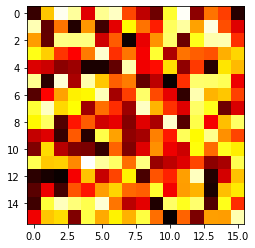

array([[0.06920007, 0.66376849, 0.98245334, 0.90196519, 0.32215933,
        0.88822607, 0.94038584, 0.47117763, 0.27479599, 0.15288286,
        0.79467491, 0.98959359, 0.1984142 , 0.53802275, 0.46057224,
        0.04578484],
       [0.92281398, 0.13385926, 0.54181816, 0.03910247, 0.59316618,
        0.08073778, 0.32631737, 0.74083409, 0.53744743, 0.40986451,
        0.83871836, 0.90465979, 0.60845356, 0.96533513, 0.48346313,
        0.31992905],
       [0.60060776, 0.13561943, 0.87507637, 0.8746345 , 0.8745786 ,
        0.29723104, 0.50462273, 0.01064468, 0.33462054, 0.58516835,
        0.84787783, 0.14744735, 0.77012802, 0.91476622, 0.92025179,
        0.43382436],
       [0.76761307, 0.67429624, 0.44563181, 0.3670498 , 0.55150478,
        0.95044853, 0.43582357, 0.54362903, 0.35611956, 0.79572424,
        0.24528337, 0.53924481, 0.50706496, 0.48720843, 0.62650381,
        0.68633255],
       [0.31561926, 0.29088166, 0.19658738, 0.22363886, 0.02776633,
        0.0288414 , 0.13728111, 

In [5]:
import matplotlib.pyplot as plt
import numpy as np

a = np.random.random((16, 16))
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
a

In [8]:
a

array([[0.06920007, 0.66376849, 0.98245334, 0.90196519, 0.32215933,
        0.88822607, 0.94038584, 0.47117763, 0.27479599, 0.15288286,
        0.79467491, 0.98959359, 0.1984142 , 0.53802275, 0.46057224,
        0.04578484],
       [0.92281398, 0.13385926, 0.54181816, 0.03910247, 0.59316618,
        0.08073778, 0.32631737, 0.74083409, 0.53744743, 0.40986451,
        0.83871836, 0.90465979, 0.60845356, 0.96533513, 0.48346313,
        0.31992905],
       [0.60060776, 0.13561943, 0.87507637, 0.8746345 , 0.8745786 ,
        0.29723104, 0.50462273, 0.01064468, 0.33462054, 0.58516835,
        0.84787783, 0.14744735, 0.77012802, 0.91476622, 0.92025179,
        0.43382436],
       [0.76761307, 0.67429624, 0.44563181, 0.3670498 , 0.55150478,
        0.95044853, 0.43582357, 0.54362903, 0.35611956, 0.79572424,
        0.24528337, 0.53924481, 0.50706496, 0.48720843, 0.62650381,
        0.68633255],
       [0.31561926, 0.29088166, 0.19658738, 0.22363886, 0.02776633,
        0.0288414 , 0.13728111, 

In [1]:
SET_1 = ["part_00.csv", "part_08.csv", "part_16.csv", "part_24.csv", "part_32.csv", "part_40.csv", "part_48.csv", 
         "part_56.csv", "part_64.csv", "part_72.csv", "part_80.csv", "part_88.csv", "part_96.csv"]

SET_2 = ["part_01.csv", "part_09.csv", "part_17.csv", "part_25.csv", "part_33.csv", "part_41.csv", "part_49.csv", 
         "part_57.csv", "part_65.csv", "part_73.csv", "part_81.csv", "part_89.csv", "part_97.csv"]

SET_3 = ["part_02.csv", "part_10.csv", "part_18.csv", "part_26.csv", "part_34.csv", "part_42.csv", "part_50.csv", 
         "part_58.csv", "part_66.csv", "part_74.csv", "part_82.csv", "part_90.csv", "part_98.csv"]

SET_4 = ["part_03.csv", "part_11.csv", "part_19.csv", "part_27.csv", "part_35.csv", "part_43.csv", "part_51.csv", 
         "part_59.csv", "part_67.csv", "part_75.csv", "part_83.csv", "part_91.csv", "part_99.csv"]

SET_5 = ["part_04.csv", "part_12.csv", "part_20.csv", "part_28.csv", "part_36.csv", "part_44.csv", 
         "part_52.csv", "part_60.csv", "part_68.csv", "part_76.csv", "part_84.csv", "part_92.csv"]

SET_6 = ["part_05.csv", "part_13.csv", "part_21.csv", "part_29.csv", "part_37.csv", "part_45.csv", 
         "part_53.csv", "part_61.csv", "part_69.csv", "part_77.csv", "part_85.csv", "part_93.csv"]

SET_7 = ["part_06.csv", "part_14.csv", "part_22.csv", "part_30.csv", "part_38.csv", "part_46.csv", 
         "part_54.csv", "part_62.csv", "part_70.csv", "part_78.csv", "part_86.csv", "part_94.csv"]

SET_8 = ["part_07.csv", "part_15.csv", "part_23.csv", "part_31.csv", "part_39.csv", "part_47.csv", 
         "part_55.csv", "part_63.csv", "part_71.csv", "part_79.csv", "part_87.csv", "part_95.csv"]

OSError: [Errno 122] Disk quota exceeded

In [32]:
authors_df[authors_df['NormalizedName'] == 'sheldon stryker'].compute()

,AuthorId,Rank,NormalizedName,DisplayName,LastKnownAffiliationId,PaperCount,PaperFamilyCount,CitationCount,CreatedDate
340601,1990712142,21166,sheldon stryker,Sheldon Stryker,NaN,1,1,2,2016-06-24
78501,2117985729,14761,sheldon stryker,Sheldon Stryker,592451.0,51,50,6880,2016-06-24
282059,2408911983,18595,sheldon stryker,Sheldon Stryker,NaN,2,2,55,2016-06-24
135851,2490140282,19426,sheldon stryker,Sheldon Stryker,NaN,1,1,82,2016-08-23
186051,2495554207,21119,sheldon stryker,Sheldon Stryker,NaN,1,1,3,2016-08-23
272965,2509121496,20888,sheldon stryker,Sheldon Stryker,NaN,1,1,6,2016-09-16
412120,2518387727,18354,sheldon stryker,Sheldon Stryker,NaN,1,1,112,2016-09-16
75075,2601569982,20504,sheldon stryker,Sheldon Stryker,NaN,2,2,0,2017-04-07
121972,2648369856,21197,sheldon stryker,Sheldon Stryker,NaN,1,1,0,2017-06-30
184090,2666609237,19539,sheldon stryker,Sheldon Stryker,NaN,1,1,81,2017-06-30


In [18]:
affiliation_df = dd.read_csv(path + 'Affiliations.txt', sep="\t", header=None)
new_columns = ['AffiliationId', 'Rank', 'NormalizedName', 'DisplayName', 'GridId', 'OfficialPage', 'WikiPage', 'PaperCount', 'PaperFamilyCount', 'CitationCount', 'Iso3166Code', 'Latitude', 'Longitude', 'CreatedDate']
affiliation_df = affiliation_df.rename(columns=dict(zip(affiliation_df.columns, new_columns)))
affiliation_df.head()

,AffiliationId,Rank,NormalizedName,DisplayName,GridId,OfficialPage,WikiPage,PaperCount,PaperFamilyCount,CitationCount,Iso3166Code,Latitude,Longitude,CreatedDate
0,20455151,9983,air liquide,Air Liquide,grid.476009.c,https://web.archive.org/web/20100205175402/htt...,http://en.wikipedia.org/wiki/Air_Liquide,7855,5757,63553,GB,52.503593,-1.805160,2016-06-24
1,24386293,13922,hellenic national meteorological service,Hellenic National Meteorological Service,NaN,http://www.hnms.gr/hnms/english/index_html,http://en.wikipedia.org/wiki/Hellenic_National...,87,87,2363,GR,37.976140,23.736400,2016-06-24
2,32956416,12976,catholic university of the west,Catholic University of the West,grid.448708.7,http://www.uco.fr/,http://en.wikipedia.org/wiki/Catholic_Universi...,402,394,4860,FR,47.464720,-0.548610,2016-06-24
3,35926432,11277,mackay medical college,Mackay Medical College,grid.452449.a,http://www.mmc.edu.tw/,http://en.wikipedia.org/wiki/Mackay_Medical_Co...,2200,2194,28443,TW,25.254360,121.495087,2016-06-24
4,37448385,11916,chinese people s public security university,Chinese People's Public Security University,NaN,http://www.ppsuc.edu.cn/,http://en.wikipedia.org/wiki/People's_Public_S...,1891,1884,3359,CN,39.904690,116.407173,2016-06-24


In [28]:
ids = [40347166, 921990950] 
#affiliation_df['AffiliationId'].isin(ids).compute()
affiliation_df[affiliation_df['AffiliationId'].isin([40347166, 921990950])].compute()
# df.fruit.isin(value_list)

,AffiliationId,Rank,NormalizedName,DisplayName,GridId,OfficialPage,WikiPage,PaperCount,PaperFamilyCount,CitationCount,Iso3166Code,Latitude,Longitude,CreatedDate
17992,40347166,5750,university of chicago,University of Chicago,grid.170205.1,http://www.uchicago.edu/,http://en.wikipedia.org/wiki/University_of_Chi...,173428,163176,7846429,US,41.78972,-87.59972,2016-06-24
23927,921990950,7136,university of colorado denver,University of Colorado Denver,grid.241116.1,http://www.ucdenver.edu/,http://en.wikipedia.org/wiki/University_of_Col...,61378,60559,2163100,US,39.74346,-105.00312,2016-06-24


In [20]:
type(authors_df['AffiliationId'])

KeyError: 'AffiliationId'

In [12]:
import multiprocessing

multiprocessing.cpu_count()

96

In [47]:
import os
import fuzzymatcher as fuzz
import csv
import dask.dataframe as dd
import pandas as pd
import re

path = '/project/jevans/MAG_0802_2021_snap_shot/'

faculty_df_complete = pd.read_csv("/home/timothyelder/Documents/data/faculty_df_complete.csv")

faculty_names = faculty_df_complete['faculty_name'].to_list()

pattern = r'(.+\,)(.+)' # regex for matching the first name and last name
aux_pattern = '(\S+)(.+)' # extra pattern for when the above doesn't match

for idx,i in enumerate(faculty_names):
    i = re.sub(r';|:', ',', i)
    # match regex to the file_name string
    if re.search(pattern, i) == None:
        match = re.search(aux_pattern, i)
        new_name = match.group(2) + ' ' + match.group(1)
        new_name = re.sub('\/', 'l', new_name, count=1) # replaces / for l, a common error
        new_name = re.sub('\,', '', new_name, count=1)
        new_name = new_name.lower()
        new_name = new_name.strip()

        faculty_names[idx] = new_name

    else:
        # match regex to the file_name string
        match = re.search(pattern, i)

        new_name = match.group(2) + ' ' + match.group(1)
        new_name = re.sub('\/', 'l', new_name, count=1) # replaces / for l, a common error
        new_name = re.sub('\,', '', new_name, count=1)
        new_name = new_name.lower()
        new_name = new_name.strip()

        faculty_names[idx] = new_name
        
faculty_df_complete['NormalizedName'] = faculty_names

faculty_df_complete = faculty_df_complete.drop(columns=['current_dept', 'year_observed', 'source_dept',
       'phd_year', 'highest_degree', 'interests', 'position', 'phd_age',
       'Degree.source', 'Eig.source', 'Degree.current', 'Eig.current',
       'diff.eig'])
        
# Load authors dataframe from MAG
authors_df = dd.read_csv(path + 'Authors.txt', sep="\t",
                         header=None, error_bad_lines=False, quoting=csv.QUOTE_NONE)

new_columns = ['AuthorId', 'Rank', 'NormalizedName', 'DisplayName', 'LastKnownAffiliationId', 'PaperCount', 'PaperFamilyCount', 'CitationCount', 'CreatedDate']

authors_df = authors_df.rename(columns=dict(zip(authors_df.columns, new_columns)))

authors_df = authors_df.drop(columns=['AuthorId', 'Rank','DisplayName', 'LastKnownAffiliationId', 'PaperCount', 'PaperFamilyCount', 'CitationCount', 'CreatedDate'])
# filtered_authors = authors_df[authors_df['NormalizedName'].isin(faculty_names)].compute()

fuzzy_matches = fuzz.fuzzy_left_join(faculty_df_complete, authors_df, left_on = "NormalizedName", right_on = "NormalizedName")

print(fuzz_matches.compute())

#fuzzy_matches.to_csv("/home/timothyelder/Documents/data/fuzzy_matches.csv")

/home/timothyelder/.conda/envs/soc_of_soc/lib/python3.7/site-packages/dask/dataframe/io/csv.py:737: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  **kwargs,
/home/timothyelder/.conda/envs/soc_of_soc/lib/python3.7/site-packages/dask/dataframe/io/csv.py:134: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  path_info,


AttributeError: 'DataFrame' object has no attribute 'insert'